In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Embedding,Flatten, SimpleRNN, LSTM, GRU, Bidirectional 


import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("review.csv")

In [3]:
df.head()

,Unnamed: 0,review,sentiment
0,0,Not sure who was more lost - the flat characte...,0
1,1,Attempting artiness with black & white and cle...,0
2,2,Very little music or anything to speak of.,0
3,3,The best scene in the movie was when Gerardo i...,1
4,4,"The rest of the movie lacks art, charm, meanin...",0


In [4]:
positive_review = ' '.join(df[df["sentiment"] == 1]["review"])
negative_review = ' '.join(df[df["sentiment"] == 0]["review"])

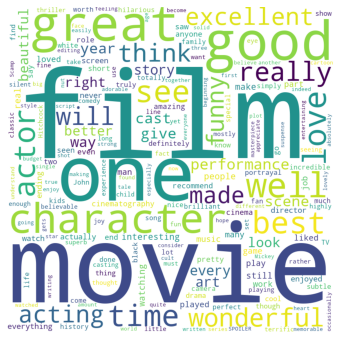

In [5]:
wc = WordCloud(width = 800, 
               height = 800, 
               background_color ='white',  
               min_font_size = 10)

wc.generate(positive_review)

plt.figure(figsize = (6,6)) 
plt.imshow(wc) 
plt.axis("off") 
plt.show()

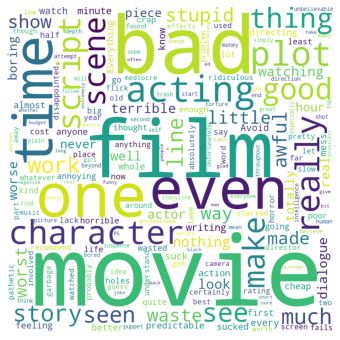

In [6]:
wc = WordCloud(width = 800, 
               height = 800, 
               background_color ='white',  
               min_font_size = 10)

wc.generate(negative_review)

plt.figure(figsize = (6,6)) 
plt.imshow(wc) 
plt.axis("off") 
plt.show()

In [7]:
# Feature and Target

X = df["review"]
y = df["sentiment"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=1)

In [8]:
# Tokenization
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [9]:
# vocabulary
tokenizer.index_word

{1: 'the',
 2: 'and',
 3: 'a',
 4: 'of',
 5: 'is',
 6: 'this',
 7: 'it',
 8: 'i',
 9: 'to',
 10: 'in',
 11: 'was',
 12: 'movie',
 13: 'film',
 14: 'that',
 15: 'for',
 16: 'with',
 17: 'as',
 18: 'but',
 19: 'are',
 20: 'on',
 21: 'not',
 22: "it's",
 23: 'just',
 24: 'one',
 25: 'you',
 26: 'bad',
 27: 'an',
 28: 'all',
 29: 'so',
 30: 'about',
 31: 'at',
 32: 'very',
 33: 'there',
 34: 'like',
 35: 'good',
 36: 'by',
 37: 'from',
 38: 'have',
 39: 'time',
 40: 'he',
 41: 'out',
 42: 'even',
 43: 'acting',
 44: 'has',
 45: 'his',
 46: 'be',
 47: 'were',
 48: 'well',
 49: 'if',
 50: 'great',
 51: 'who',
 52: 'characters',
 53: 'how',
 54: 'more',
 55: 'my',
 56: 'or',
 57: 'really',
 58: 'see',
 59: 'when',
 60: 'some',
 61: 'than',
 62: 'no',
 63: 'best',
 64: 'plot',
 65: 'made',
 66: 'story',
 67: 'movies',
 68: 'character',
 69: "didn't",
 70: 'most',
 71: 'scenes',
 72: 'wonderful',
 73: 'its',
 74: 'better',
 75: "don't",
 76: '10',
 77: 'me',
 78: 'ever',
 79: 'they',
 80: 'what

In [10]:
vocab_len = len(tokenizer.index_word)
vocab_len

2486

In [11]:
# text to sequence
train_sequence = tokenizer.texts_to_sequences(X_train)

In [12]:
doc_len = []

for doc in train_sequence:
  doc_len.append(len(doc))

In [13]:
max(doc_len)

69

In [14]:
np.quantile(doc_len, 0.99)

45.0

In [15]:
max_length = 45

In [16]:
# padding
train_matrix = sequence.pad_sequences(train_sequence,max_length)
train_matrix

array([[  0,   0,   0, ..., 915, 532, 102],
       [  0,   0,   0, ...,   3, 377,  12],
       [  0,   0,   0, ...,   5, 378, 916],
       ...,
       [  0,   0,   0, ...,   3,  85,  12],
       [  0,   0,   0, ...,  20,   2,  20],
       [  0,   0,   0, ...,  22, 454, 840]])

In [17]:
# test data

test_sequence = tokenizer.texts_to_sequences(X_test)
test_matrix = sequence.pad_sequences(test_sequence,max_length)
test_matrix

array([[  0,   0,   0, ...,   3, 388, 111],
       [  0,   0,   0, ...,   9, 101,  77],
       [  0,   0,   0, ...,  42,  35,  15],
       ...,
       [  0,   0,   0, ...,   3,  35, 222],
       [  0,   0,   0, ...,  22,  23, 551],
       [  0,   0,   0, ...,  12,   5, 128]])

In [18]:
# RNN
model = Sequential()
model.add(Embedding( input_dim=vocab_len+1,
                     output_dim=64,
                     input_length=max_length,
                     mask_zero=True))
model.add(SimpleRNN(64))
model.add(Dense(64, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

In [19]:
model.compile(optimizer="adam",loss="binary_crossentropy")
model.fit(train_matrix,y_train,epochs=10,batch_size=32)

Epoch 1/10
22/22 [==============================] - 2s 14ms/step - loss: 0.6945
Epoch 2/10
22/22 [==============================] - 0s 13ms/step - loss: 0.6321
Epoch 3/10
22/22 [==============================] - 0s 12ms/step - loss: 0.3838
Epoch 4/10
22/22 [==============================] - 0s 12ms/step - loss: 0.1171
Epoch 5/10
22/22 [==============================] - 0s 13ms/step - loss: 0.0427
Epoch 6/10
22/22 [==============================] - 0s 16ms/step - loss: 0.0190
Epoch 7/10
22/22 [==============================] - 0s 14ms/step - loss: 0.0109
Epoch 8/10
22/22 [==============================] - 0s 13ms/step - loss: 0.0051
Epoch 9/10
22/22 [==============================] - 0s 13ms/step - loss: 0.0032
Epoch 10/10
22/22 [==============================] - 0s 12ms/step - loss: 0.0023


In [20]:
y_pred = model.predict(test_matrix)

y_pred = np.where(y_pred >= 0.5, 1, 0)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.61      0.54      0.57       151
           1       0.58      0.65      0.61       149

    accuracy                           0.59       300
   macro avg       0.59      0.59      0.59       300
weighted avg       0.60      0.59      0.59       300



In [21]:
## Multi-layer RNN

model1 = Sequential()
model1.add(Embedding( input_dim=vocab_len+1,
                     output_dim=64,
                     input_length=max_length,
                     mask_zero=True))
model1.add(SimpleRNN(64, return_sequences=True))
model1.add(SimpleRNN(64, return_sequences=True))
model1.add(SimpleRNN(64))
model1.add(Dense(64, activation="relu"))
model1.add(Dense(32, activation="relu"))
model1.add(Dense(1, activation="sigmoid"))

In [22]:
model1.compile(optimizer="adam",loss="binary_crossentropy")
model1.fit(train_matrix,y_train,epochs=10,batch_size=32)

Epoch 1/10
22/22 [==============================] - 4s 31ms/step - loss: 0.7042
Epoch 2/10
22/22 [==============================] - 1s 31ms/step - loss: 0.5800
Epoch 3/10
22/22 [==============================] - 1s 33ms/step - loss: 0.2902
Epoch 4/10
22/22 [==============================] - 1s 31ms/step - loss: 0.1191
Epoch 5/10
22/22 [==============================] - 1s 29ms/step - loss: 0.0418
Epoch 6/10
22/22 [==============================] - 1s 31ms/step - loss: 0.0219
Epoch 7/10
22/22 [==============================] - 1s 33ms/step - loss: 0.0116
Epoch 8/10
22/22 [==============================] - 1s 32ms/step - loss: 0.0105
Epoch 9/10
22/22 [==============================] - 1s 31ms/step - loss: 0.0060
Epoch 10/10
22/22 [==============================] - 1s 32ms/step - loss: 0.0047


In [23]:
y_pred = model1.predict(test_matrix)

y_pred = np.where(y_pred >= 0.5, 1, 0)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.53      0.56      0.54       151
           1       0.52      0.50      0.51       149

    accuracy                           0.53       300
   macro avg       0.53      0.53      0.53       300
weighted avg       0.53      0.53      0.53       300



In [24]:
## Bidirectional RNN

model2 = Sequential()
model2.add(Embedding( input_dim=vocab_len+1,
                     output_dim=64,
                     input_length=max_length,
                     mask_zero=True))
model2.add(Bidirectional(SimpleRNN(64)))
model2.add(Dense(64, activation="relu"))
model2.add(Dense(32, activation="relu"))
model2.add(Dense(1, activation="sigmoid"))

In [25]:
model2.compile(optimizer="adam",loss="binary_crossentropy")
model2.fit(train_matrix,y_train,epochs=10,batch_size=32)

Epoch 1/10
22/22 [==============================] - 3s 25ms/step - loss: 0.6940
Epoch 2/10
22/22 [==============================] - 1s 25ms/step - loss: 0.5950
Epoch 3/10
22/22 [==============================] - 1s 24ms/step - loss: 0.3090
Epoch 4/10
22/22 [==============================] - 1s 25ms/step - loss: 0.0694
Epoch 5/10
22/22 [==============================] - 1s 25ms/step - loss: 0.0147
Epoch 6/10
22/22 [==============================] - 1s 26ms/step - loss: 0.0057
Epoch 7/10
22/22 [==============================] - 1s 25ms/step - loss: 0.0033
Epoch 8/10
22/22 [==============================] - 1s 26ms/step - loss: 0.0023
Epoch 9/10
22/22 [==============================] - 1s 26ms/step - loss: 0.0017
Epoch 10/10
22/22 [==============================] - 1s 24ms/step - loss: 0.0013


In [26]:
y_pred = model2.predict(test_matrix)

y_pred = np.where(y_pred >= 0.5, 1, 0)

In [27]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.56      0.63      0.59       151
           1       0.57      0.49      0.53       149

    accuracy                           0.56       300
   macro avg       0.56      0.56      0.56       300
weighted avg       0.56      0.56      0.56       300



In [28]:
# LSTM

model3 = Sequential()
model3.add(Embedding( input_dim=vocab_len+1,
                     output_dim=64,
                     input_length=max_length,
                     mask_zero=True))
model3.add(LSTM(64))
model3.add(Dense(64, activation="relu"))
model3.add(Dense(32, activation="relu"))
model3.add(Dense(1, activation="sigmoid"))

In [29]:
model3.compile(optimizer="adam",loss="binary_crossentropy")
model3.fit(train_matrix,y_train,epochs=10,batch_size=32)

Epoch 1/10
22/22 [==============================] - 4s 24ms/step - loss: 0.6928
Epoch 2/10
22/22 [==============================] - 1s 24ms/step - loss: 0.6728
Epoch 3/10
22/22 [==============================] - 1s 24ms/step - loss: 0.4570
Epoch 4/10
22/22 [==============================] - 1s 24ms/step - loss: 0.1923
Epoch 5/10
22/22 [==============================] - 1s 24ms/step - loss: 0.0779
Epoch 6/10
22/22 [==============================] - 1s 25ms/step - loss: 0.0410
Epoch 7/10
22/22 [==============================] - 1s 25ms/step - loss: 0.0216
Epoch 8/10
22/22 [==============================] - 1s 25ms/step - loss: 0.0136
Epoch 9/10
22/22 [==============================] - 1s 24ms/step - loss: 0.0103
Epoch 10/10
22/22 [==============================] - 1s 24ms/step - loss: 0.0083


In [30]:
y_pred = model3.predict(test_matrix)

y_pred = np.where(y_pred >= 0.5, 1, 0)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.79      0.76       151
           1       0.77      0.72      0.74       149

    accuracy                           0.75       300
   macro avg       0.75      0.75      0.75       300
weighted avg       0.75      0.75      0.75       300



In [31]:
# Multi_layer lstm
model4 = Sequential()
model4.add(Embedding( input_dim=vocab_len+1,
                     output_dim=64,
                     input_length=max_length,
                     mask_zero=True))
model4.add(LSTM(64, return_sequences=True))
model4.add(LSTM(64, return_sequences=True))
model4.add(LSTM(64))
model4.add(Dense(64, activation="relu"))
model4.add(Dense(32, activation="relu"))
model4.add(Dense(1, activation="sigmoid"))

In [32]:
model4.compile(optimizer="adam",loss="binary_crossentropy")
model4.fit(train_matrix,y_train,epochs=20,batch_size=32)

Epoch 1/20
22/22 [==============================] - 13s 65ms/step - loss: 0.6932
Epoch 2/20
22/22 [==============================] - 1s 66ms/step - loss: 0.6452
Epoch 3/20
22/22 [==============================] - 2s 70ms/step - loss: 0.3766
Epoch 4/20
22/22 [==============================] - 1s 68ms/step - loss: 0.1995
Epoch 5/20
22/22 [==============================] - 1s 66ms/step - loss: 0.0958
Epoch 6/20
22/22 [==============================] - 1s 66ms/step - loss: 0.0503
Epoch 7/20
22/22 [==============================] - 1s 65ms/step - loss: 0.0259
Epoch 8/20
22/22 [==============================] - 1s 68ms/step - loss: 0.0179
Epoch 9/20
22/22 [==============================] - 1s 67ms/step - loss: 0.0069
Epoch 10/20
22/22 [==============================] - 2s 72ms/step - loss: 0.0036
Epoch 11/20
22/22 [==============================] - 2s 69ms/step - loss: 0.0024
Epoch 12/20
22/22 [==============================] - 1s 67ms/step - loss: 0.0017
Epoch 13/20
22/22 [=================

In [33]:
y_pred = model4.predict(test_matrix)

y_pred = np.where(y_pred >= 0.5, 1, 0)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.68      0.71       151
           1       0.70      0.76      0.73       149

    accuracy                           0.72       300
   macro avg       0.72      0.72      0.72       300
weighted avg       0.72      0.72      0.72       300



In [34]:
## Bidirectional LSTM

model5 = Sequential()
model5.add(Embedding( input_dim=vocab_len+1,
                     output_dim=64,
                     input_length=max_length,
                     mask_zero=True))
model5.add(Bidirectional(LSTM(64)))
model5.add(Dense(64, activation="relu"))
model5.add(Dense(32, activation="relu"))
model5.add(Dense(1, activation="sigmoid"))

In [35]:
model5.compile(optimizer="adam",loss="binary_crossentropy")
model5.fit(train_matrix,y_train,epochs=10,batch_size=32)

Epoch 1/10
22/22 [==============================] - 8s 29ms/step - loss: 0.6927
Epoch 2/10
22/22 [==============================] - 1s 30ms/step - loss: 0.6633
Epoch 3/10
22/22 [==============================] - 1s 30ms/step - loss: 0.4184
Epoch 4/10
22/22 [==============================] - 1s 30ms/step - loss: 0.1476
Epoch 5/10
22/22 [==============================] - 1s 30ms/step - loss: 0.0591
Epoch 6/10
22/22 [==============================] - 1s 30ms/step - loss: 0.0309
Epoch 7/10
22/22 [==============================] - 1s 30ms/step - loss: 0.0239
Epoch 8/10
22/22 [==============================] - 1s 29ms/step - loss: 0.0475
Epoch 9/10
22/22 [==============================] - 1s 29ms/step - loss: 0.0255
Epoch 10/10
22/22 [==============================] - 1s 28ms/step - loss: 0.0139


In [36]:
y_pred = model5.predict(test_matrix)

y_pred = np.where(y_pred >= 0.5, 1, 0)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.75      0.74       151
           1       0.74      0.73      0.74       149

    accuracy                           0.74       300
   macro avg       0.74      0.74      0.74       300
weighted avg       0.74      0.74      0.74       300



In [37]:
# Bidirectional LSTM and Multi-layer

model6 = Sequential()
model6.add(Embedding( input_dim=vocab_len+1,
                     output_dim=64,
                     input_length=max_length,
                     mask_zero=True))
model6.add(Bidirectional(LSTM(64, return_sequences=True)))
model6.add(Bidirectional(LSTM(64)))
model6.add(Dense(64, activation="relu"))
model6.add(Dense(1, activation="sigmoid"))

In [38]:
model6.compile(optimizer="adam",loss="binary_crossentropy")
model6.fit(train_matrix,y_train,epochs=20,batch_size=8)

Epoch 1/20
88/88 [==============================] - 21s 47ms/step - loss: 0.6832
Epoch 2/20
88/88 [==============================] - 4s 46ms/step - loss: 0.3578
Epoch 3/20
88/88 [==============================] - 4s 51ms/step - loss: 0.0865
Epoch 4/20
88/88 [==============================] - 6s 72ms/step - loss: 0.0351
Epoch 5/20
88/88 [==============================] - 7s 78ms/step - loss: 0.0277
Epoch 6/20
88/88 [==============================] - 6s 64ms/step - loss: 0.0292
Epoch 7/20
88/88 [==============================] - 5s 56ms/step - loss: 0.0132
Epoch 8/20
88/88 [==============================] - 4s 48ms/step - loss: 0.0074
Epoch 9/20
88/88 [==============================] - 4s 48ms/step - loss: 0.0012
Epoch 10/20
88/88 [==============================] - 4s 48ms/step - loss: 6.4141e-04
Epoch 11/20
88/88 [==============================] - 5s 54ms/step - loss: 4.4523e-04
Epoch 12/20
88/88 [==============================] - 6s 64ms/step - loss: 3.1989e-04
Epoch 13/20
88/88 [=====

In [39]:
y_pred = model6.predict(test_matrix)

y_pred = np.where(y_pred >= 0.5, 1, 0)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.71      0.75       151
           1       0.73      0.81      0.77       149

    accuracy                           0.76       300
   macro avg       0.76      0.76      0.76       300
weighted avg       0.76      0.76      0.76       300



In [40]:
# GRU

model7 = Sequential()
model7.add(Embedding( input_dim=vocab_len+1,
                     output_dim=64,
                     input_length=max_length,
                     mask_zero=True))
model7.add(GRU(64))
model7.add(Dense(64, activation="relu"))
model7.add(Dense(32, activation="relu"))
model7.add(Dense(1, activation="sigmoid"))

In [41]:
model7.compile(optimizer="adam",loss="binary_crossentropy")
model7.fit(train_matrix,y_train,epochs=10,batch_size=32)

Epoch 1/10
22/22 [==============================] - 4s 23ms/step - loss: 0.6924
Epoch 2/10
22/22 [==============================] - 1s 24ms/step - loss: 0.6637
Epoch 3/10
22/22 [==============================] - 0s 22ms/step - loss: 0.4209
Epoch 4/10
22/22 [==============================] - 0s 23ms/step - loss: 0.1166
Epoch 5/10
22/22 [==============================] - 0s 23ms/step - loss: 0.0563
Epoch 6/10
22/22 [==============================] - 0s 21ms/step - loss: 0.0244
Epoch 7/10
22/22 [==============================] - 0s 22ms/step - loss: 0.0117
Epoch 8/10
22/22 [==============================] - 0s 22ms/step - loss: 0.0093
Epoch 9/10
22/22 [==============================] - 1s 23ms/step - loss: 0.0071
Epoch 10/10
22/22 [==============================] - 0s 22ms/step - loss: 0.0034


In [42]:
y_pred = model7.predict(test_matrix)

y_pred = np.where(y_pred >= 0.5, 1, 0)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.73      0.76       151
           1       0.74      0.80      0.77       149

    accuracy                           0.76       300
   macro avg       0.76      0.76      0.76       300
weighted avg       0.76      0.76      0.76       300



In [47]:
# Multi_layer GRU
model8 = Sequential()
model8.add(Embedding( input_dim=vocab_len+1,
                     output_dim=64,
                     input_length=max_length,
                     mask_zero=True))
model8.add(GRU(32, return_sequences=True))
model8.add(GRU(32, return_sequences=True))
model8.add(GRU(32))
model8.add(Dense(64, activation="relu"))
model8.add(Dense(32, activation="relu"))
model8.add(Dense(1, activation="sigmoid"))

In [48]:
model8.compile(optimizer="adam",loss="binary_crossentropy")
model8.fit(train_matrix,y_train,epochs=10,batch_size=16)

Epoch 1/10
44/44 [==============================] - 13s 52ms/step - loss: 0.6939
Epoch 2/10
44/44 [==============================] - 2s 51ms/step - loss: 0.5711
Epoch 3/10
44/44 [==============================] - 2s 52ms/step - loss: 0.1934
Epoch 4/10
44/44 [==============================] - 2s 52ms/step - loss: 0.0700
Epoch 5/10
44/44 [==============================] - 2s 51ms/step - loss: 0.0244
Epoch 6/10
44/44 [==============================] - 2s 52ms/step - loss: 0.0182
Epoch 7/10
44/44 [==============================] - 2s 52ms/step - loss: 0.0130
Epoch 8/10
44/44 [==============================] - 2s 52ms/step - loss: 0.0104
Epoch 9/10
44/44 [==============================] - 2s 54ms/step - loss: 0.0059
Epoch 10/10
44/44 [==============================] - 2s 52ms/step - loss: 8.7272e-04


In [49]:
y_pred = model8.predict(test_matrix)

y_pred = np.where(y_pred >= 0.5, 1, 0)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.76      0.74       151
           1       0.74      0.69      0.72       149

    accuracy                           0.73       300
   macro avg       0.73      0.73      0.73       300
weighted avg       0.73      0.73      0.73       300



In [50]:
## Bidirectional GRU

model9 = Sequential()
model9.add(Embedding( input_dim=vocab_len+1,
                     output_dim=64,
                     input_length=max_length,
                     mask_zero=True))
model9.add(Bidirectional(GRU(64)))
model9.add(Dense(64, activation="relu"))
model9.add(Dense(32, activation="relu"))
model9.add(Dense(1, activation="sigmoid"))

In [51]:
model9.compile(optimizer="adam",loss="binary_crossentropy")
model9.fit(train_matrix,y_train,epochs=10,batch_size=16)

Epoch 1/10
44/44 [==============================] - 9s 25ms/step - loss: 0.6932
Epoch 2/10
44/44 [==============================] - 1s 25ms/step - loss: 0.6275
Epoch 3/10
44/44 [==============================] - 1s 27ms/step - loss: 0.2649
Epoch 4/10
44/44 [==============================] - 1s 25ms/step - loss: 0.0770
Epoch 5/10
44/44 [==============================] - 1s 25ms/step - loss: 0.0332
Epoch 6/10
44/44 [==============================] - 1s 24ms/step - loss: 0.0132
Epoch 7/10
44/44 [==============================] - 1s 25ms/step - loss: 0.0095
Epoch 8/10
44/44 [==============================] - 1s 25ms/step - loss: 0.0066
Epoch 9/10
44/44 [==============================] - 1s 25ms/step - loss: 0.0064
Epoch 10/10
44/44 [==============================] - 1s 25ms/step - loss: 0.0017


In [52]:
y_pred = model9.predict(test_matrix)

y_pred = np.where(y_pred >= 0.5, 1, 0)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.71      0.75       151
           1       0.73      0.81      0.77       149

    accuracy                           0.76       300
   macro avg       0.76      0.76      0.76       300
weighted avg       0.76      0.76      0.76       300



In [53]:
# Bidirectional GRU and Multi-layer

model10 = Sequential()
model10.add(Embedding( input_dim=vocab_len+1,
                     output_dim=64,
                     input_length=max_length,
                     mask_zero=True))
model10.add(Bidirectional(GRU(64, return_sequences=True)))
model10.add(Bidirectional(GRU(64)))
model10.add(Dense(64, activation="relu"))
model10.add(Dense(1, activation="sigmoid"))

In [54]:
model10.compile(optimizer="adam",loss="binary_crossentropy")
model10.fit(train_matrix,y_train,epochs=20,batch_size=8)

Epoch 1/20
88/88 [==============================] - 18s 46ms/step - loss: 0.6889
Epoch 2/20
88/88 [==============================] - 4s 42ms/step - loss: 0.3738
Epoch 3/20
88/88 [==============================] - 4s 43ms/step - loss: 0.0727
Epoch 4/20
88/88 [==============================] - 4s 50ms/step - loss: 0.0263
Epoch 5/20
88/88 [==============================] - 4s 46ms/step - loss: 0.0182
Epoch 6/20
88/88 [==============================] - 5s 51ms/step - loss: 0.0162
Epoch 7/20
88/88 [==============================] - 4s 48ms/step - loss: 0.0083
Epoch 8/20
88/88 [==============================] - 4s 47ms/step - loss: 0.0010
Epoch 9/20
88/88 [==============================] - 4s 43ms/step - loss: 2.8319e-04
Epoch 10/20
88/88 [==============================] - 4s 46ms/step - loss: 1.8699e-04
Epoch 11/20
88/88 [==============================] - 5s 53ms/step - loss: 1.3873e-04
Epoch 12/20
88/88 [==============================] - 5s 52ms/step - loss: 1.0761e-04
Epoch 13/20
88/88 [=

In [55]:
y_pred = model10.predict(test_matrix)

y_pred = np.where(y_pred >= 0.5, 1, 0)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.77      0.75       151
           1       0.76      0.72      0.74       149

    accuracy                           0.75       300
   macro avg       0.75      0.75      0.75       300
weighted avg       0.75      0.75      0.75       300

